In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import product
from dateutil.relativedelta import relativedelta

import scipy.stats as scs
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from scipy.optimize import minimize

from sklearn.metrics import mean_absolute_error, mean_squared_error

from tqdm.notebook import tqdm
from tqdm import tqdm_notebook

from sklearn.model_selection import train_test_split # разбиение данных на тренировочные и тестовые


from sklearn.preprocessing import StandardScaler # нормализация и масштабирование данных

from sklearn.model_selection import TimeSeriesSplit

from sklearn.model_selection import cross_val_score # кроссвалидация
from sklearn.model_selection import GridSearchCV # подбор гиперпараметров с кроссвалидацией

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV, RidgeCV
from xgboost import XGBRegressor

import statsmodels


import gc
import glob
import os
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from numpy import percentile

# sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples
from tqdm import tqdm
from tensorflow.keras.models import load_model

from itertools import product

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
all_files_cpu = glob.glob(os.path.join("/content/drive/MyDrive/Colab Notebooks/k8s/cpu/*.csv"))
all_files_cpu.sort()

li = []

for filename in all_files_cpu:
    print(filename)
    df = pd.read_csv(filename, skiprows=[0], parse_dates=['Time'])
    li.append(df)


cpu = pd.concat(li, axis=0, ignore_index=True)

fields_nodes_all = ['real: cl1i6ek5us1gmcv87dql-oqaz |  ', 'real: cl1i6ek5us1gmcv87dql-ulyg |  ', 'real: cl1i6ek5us1gmcv87dql-utuc |  ']
fields_nodes_first = ['Time', 'real: cl1i6ek5us1gmcv87dql-oqaz |  ']

cpu.columns = ['Time', 'node1', 'node2', 'node3']
cpu['nodes_all'] = cpu['node1'] + cpu['node2'] + cpu['node3']


/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU10-15__10-20.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU10-21__10-24.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU10-25__10-27.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU10-27__11-03.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU11-03__11-08.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU11-08__11-11.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU11-12__11-14.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU11-14__11-18.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU11-19__11-22.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU2023-11-22__2023-11-26.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU2023-11-27__2023-12-02.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU2023-12-02__2023-12-09.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU2023-12-10__2023-12-16.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU2023-12-17-2023-12-22.csv
/content/driv

In [ ]:
cpu

,Time,node1,node2,node3,nodes_all
0,2023-10-15 19:10:00,0.7230,0.174,0.490,1.3870
1,2023-10-15 19:15:00,1.6500,0.953,0.492,3.0950
2,2023-10-15 19:20:00,1.3900,0.824,0.378,2.5920
3,2023-10-15 19:25:00,1.4000,0.734,0.473,2.6070
4,2023-10-15 19:30:00,1.4900,0.879,0.528,2.8970
...,...,...,...,...,...
31031,2024-02-04 23:35:00,0.0799,0.218,0.186,0.4839
31032,2024-02-04 23:40:00,0.0799,0.218,0.188,0.4859
31033,2024-02-04 23:45:00,0.0801,0.215,0.188,0.4831
31034,2024-02-04 23:50:00,0.0805,0.217,0.187,0.4845


In [ ]:
df_cpu = cpu[['Time', 'node1']]
df_cpu.columns = ['time', 'cpu_usage']
df_cpu.set_index('time', inplace=True)

#df_cpu = df_cpu.resample('1H', base=0.5).last()


print(df_cpu.isnull().any())
print(df_cpu.isna().any())
df_cpu['cpu_usage'].fillna(df_cpu['cpu_usage'].mean(), inplace=True)
print(df_cpu.isnull().any())
print(df_cpu.isna().any())

cpu_usage    False
dtype: bool
cpu_usage    False
dtype: bool
cpu_usage    False
dtype: bool
cpu_usage    False
dtype: bool


In [ ]:
df_cpu

,cpu_usage
time,
2023-10-15 19:10:00,0.7230
2023-10-15 19:15:00,1.6500
2023-10-15 19:20:00,1.3900
2023-10-15 19:25:00,1.4000
2023-10-15 19:30:00,1.4900
...,...
2024-02-04 23:35:00,0.0799
2024-02-04 23:40:00,0.0799
2024-02-04 23:45:00,0.0801


In [ ]:
all_files_ram = glob.glob(os.path.join("/content/drive/MyDrive/Colab Notebooks/k8s/ram/*.csv"))
all_files_ram.sort()

li = []

for filename in all_files_ram:
    df = pd.read_csv(filename, skiprows=[0], parse_dates=['Time'])
    li.append(df)


ram = pd.concat(li, axis=0, ignore_index=True)

fields_nodes_all = ['real: cl1i6ek5us1gmcv87dql-oqaz |  ', 'real: cl1i6ek5us1gmcv87dql-ulyg |  ', 'real: cl1i6ek5us1gmcv87dql-utuc |  ']
fields_nodes_first = ['Time', 'real: cl1i6ek5us1gmcv87dql-oqaz |  ']

ram.columns = ['Time', 'node1', 'node2', 'node3']
ram['nodes_all'] = ram['node1'] + ram['node2'] + ram['node3']

In [ ]:
ram

,Time,node1,node2,node3,nodes_all
0,2023-10-15 19:10:00,37038891008,36398960640,38560374784,111998226432
1,2023-10-15 19:15:00,37153251328,36420562944,39022686208,112596500480
2,2023-10-15 19:20:00,37240102912,36420161536,39149137920,112809402368
3,2023-10-15 19:25:00,37333958656,36423467008,39163170816,112920596480
4,2023-10-15 19:30:00,37343805440,36425986048,40512155648,114281947136
...,...,...,...,...,...
31031,2024-02-04 23:35:00,59966435328,50358718464,52388679680,162713833472
31032,2024-02-04 23:40:00,60111867904,50365763584,52309880832,162787512320
31033,2024-02-04 23:45:00,60007501824,50336706560,52273143808,162617352192
31034,2024-02-04 23:50:00,59999752192,50343628800,52292202496,162635583488


In [ ]:
df_ram = ram[['Time', 'node1']]
df_ram.columns = ['time', 'ram_usage']
df_ram.set_index('time', inplace=True)

#df_ram = df_ram.resample('1H', base=0.5).last()


print(df_ram.isnull().any())
print(df_ram.isna().any())
df_ram['ram_usage'].fillna(df_ram['ram_usage'].mean(), inplace=True)
print(df_ram.isnull().any())
print(df_ram.isna().any())

ram_usage    False
dtype: bool
ram_usage    False
dtype: bool
ram_usage    False
dtype: bool
ram_usage    False
dtype: bool


In [ ]:
df_ram

,ram_usage
time,
2023-10-15 19:10:00,37038891008
2023-10-15 19:15:00,37153251328
2023-10-15 19:20:00,37240102912
2023-10-15 19:25:00,37333958656
2023-10-15 19:30:00,37343805440
...,...
2024-02-04 23:35:00,59966435328
2024-02-04 23:40:00,60111867904
2024-02-04 23:45:00,60007501824


In [ ]:
df_cpu['ram_usage'] = df_ram['ram_usage']
df = df_cpu
X = df.copy()
df

,cpu_usage,ram_usage
time,,
2023-10-15 19:10:00,0.7230,37038891008
2023-10-15 19:15:00,1.6500,37153251328
2023-10-15 19:20:00,1.3900,37240102912
2023-10-15 19:25:00,1.4000,37333958656
2023-10-15 19:30:00,1.4900,37343805440
...,...,...
2024-02-04 23:35:00,0.0799,59966435328
2024-02-04 23:40:00,0.0799,60111867904
2024-02-04 23:45:00,0.0801,60007501824


In [ ]:
for column in df.columns:
    fig = px.line(df, x=df.index, y=[column], title='AWS ' + column, template = 'plotly_white')
    fig.update_layout(
      autosize=False,
      width=800,
      height=500,
    )
    fig.show()

# Transformer

In [ ]:
df_sc = df.copy()
column_usage = 'ram_usage'

scaler = StandardScaler()
scaler = scaler.fit(df_sc[[column_usage]])

df_sc[column_usage] = scaler.transform(df[[column_usage]])

In [ ]:
print(df)
df_test = df.iloc[::12, :]

print(df_test)

df_7th_average = df.groupby(np.arange(len(df))//12).mean()
df_test.set_index(df_test.index, inplace=True)

print(df_7th_average)
df_test['cpu_usage'] = df_7th_average.iloc[:, 0].values
df_test['ram_usage'] = df_7th_average.iloc[:, 1].values


df_test = df_test.iloc[420:]
print(df_test)

# df.set_index('time', inplace=True)
# print(df_test)

                     cpu_usage    ram_usage
time                                       
2023-10-15 19:10:00     0.7230  37038891008
2023-10-15 19:15:00     1.6500  37153251328
2023-10-15 19:20:00     1.3900  37240102912
2023-10-15 19:25:00     1.4000  37333958656
2023-10-15 19:30:00     1.4900  37343805440
...                        ...          ...
2024-02-04 23:35:00     0.0799  59966435328
2024-02-04 23:40:00     0.0799  60111867904
2024-02-04 23:45:00     0.0801  60007501824
2024-02-04 23:50:00     0.0805  59999752192
2024-02-04 23:55:00     0.0808  59993530368

[31036 rows x 2 columns]
                     cpu_usage    ram_usage
time                                       
2023-10-15 19:10:00     0.7230  37038891008
2023-10-15 20:10:00     1.4400  37747802112
2023-10-15 21:10:00     1.6000  39032868864
2023-10-15 22:10:00     1.5800  40231411712
2023-10-15 23:10:00     1.5000  40795615232
...                        ...          ...
2024-02-04 19:40:00     0.0799  60011954176
2024-0

In [ ]:
from joblib import dump, load
dump(scaler, 'std_scaler.bin', compress=True)

['std_scaler.bin']

In [ ]:
!pip install deepod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.8/203.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.1/890.1 MB 462.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 47.3 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.2.1+cu121
    Uninstalling torch-2.2.1+cu121:
      Successfully uninstalled torch-2.2.1+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.2.1+cu121 requires torch==2.2.1, but you have torch 1.13.0 which is incompatible.
torchdata 0.7.1 requires torch>=2, but you have torch 1.13.0 which is 

In [ ]:
# abc = []
# for i in range(0, 2550):
#   tmp = df[[column_usage]].iloc[i*12:(i+1)*12].values.ravel()
#   abc.append(tmp)


# abc = np.array(abc)
# print(abc)

[[0.723  1.65   1.39   ... 1.57   1.65   1.48  ]
 [1.44   1.48   1.7    ... 1.41   1.47   1.66  ]
 [1.6    1.32   1.47   ... 1.61   1.48   1.42  ]
 ...
 [0.0997 0.107  0.1    ... 0.106  0.107  0.104 ]
 [0.0962 0.103  0.106  ... 0.107  0.0975 0.109 ]
 [0.14   0.104  0.22   ... 0.088  0.0818 0.0792]]


In [ ]:
# print(np.array(abc))

In [ ]:
from deepod.models.time_series import AnomalyTransformer

model = AnomalyTransformer(
    device='cpu',
    epochs=3,
    lr=0.01,
    stride=1,
    seq_len=1
    )
model.fit(df_test[[column_usage]].values)

#model.fit(df[[column_usage]].iloc[500:1000])
#model.fit(df[[column_usage]].iloc[1000:1500])

epoch  1, training loss: 3915189635384166318080.000000, time: 3.6s
epoch  2, training loss: 3962195950097687117824.000000, time: 2.9s
epoch  3, training loss: 4100130209968477962240.000000, time: 2.9s


In [ ]:
# averages = []
# for line in abc:
#   averages.append(np.mean(line))

# average = np.array(averages)

In [ ]:
# df_tmp = pd.DataFrame(averages)
# df_tmp.columns = ['cpu_usage']



# pred = model.predict(abc)
# df_tmp['outlier'] = pred

# print(df_tmp)

# dfx = df_tmp.copy()
# dfx = dfx.iloc[:10]

      cpu_usage  outlier
0      1.436917        0
1      1.528333        0
2      1.524167        0
3      1.568333        0
4      1.535000        0
...         ...      ...
2545   0.095558        0
2546   0.103117        0
2547   0.110975        0
2548   0.107558        0
2549   0.112517        0

[2550 rows x 2 columns]


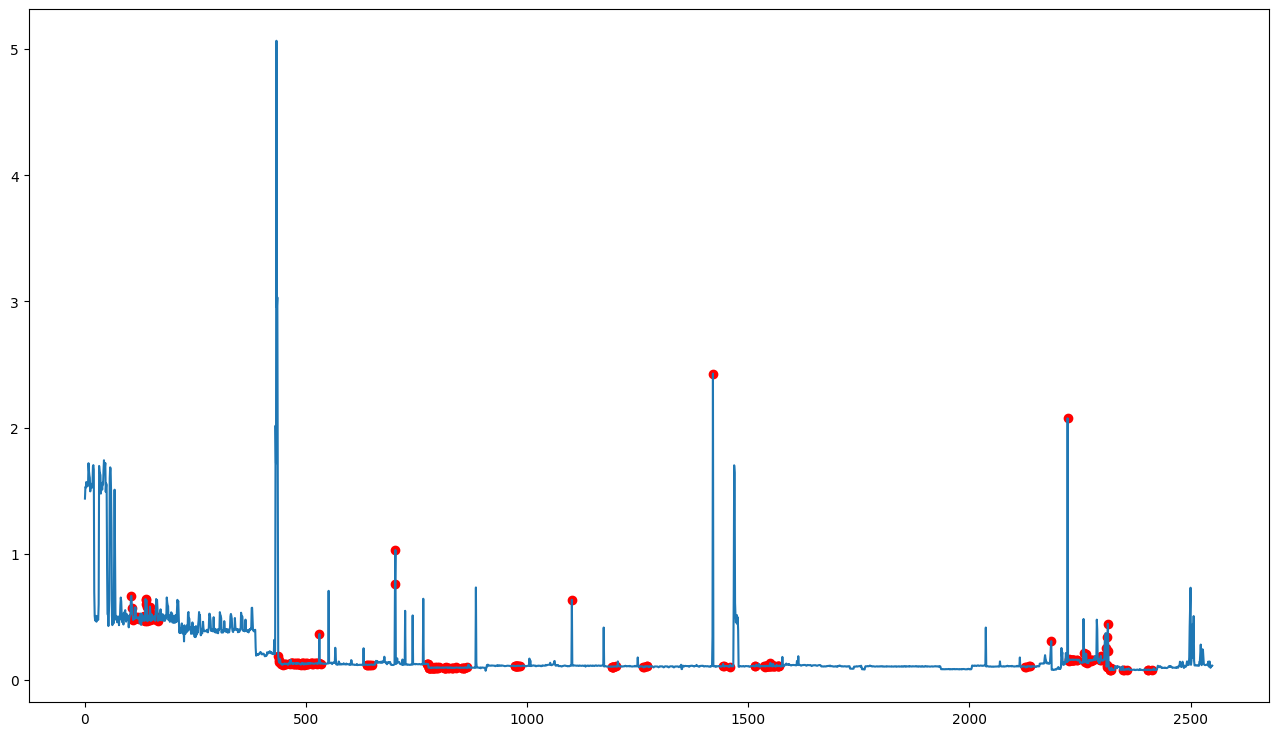

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
a = dfx.loc[dfx.outlier == 1, [column_usage]]

ax.plot(dfx[column_usage])
ax.scatter(a.index, a[column_usage], color='red')
plt.show()

In [ ]:
df_test = df.iloc[:10000]
pred = model.predict(df_test[[column_usage]])
dfx = df_test.copy()
dfx["pred"] = pred
dfx

,cpu_usage,ram_usage,pred
time,,,
2023-10-15 19:10:00,0.7230,37038891008,0
2023-10-15 19:15:00,1.6500,37153251328,0
2023-10-15 19:20:00,1.3900,37240102912,0
2023-10-15 19:25:00,1.4000,37333958656,0
2023-10-15 19:30:00,1.4900,37343805440,0
...,...,...,...
2023-11-20 03:10:00,0.0952,84543246336,1
2023-11-20 03:15:00,0.0964,84521627648,1
2023-11-20 03:20:00,0.0958,84516941824,1


In [ ]:
pred = model.predict(df[[column_usage]])
dfx = df.copy()
dfx["outlier"] = pred
dfx

,cpu_usage,ram_usage,outlier
time,,,
2023-10-15 19:10:00,0.7230,37038891008,0
2023-10-15 19:15:00,1.6500,37153251328,0
2023-10-15 19:20:00,1.3900,37240102912,0
2023-10-15 19:25:00,1.4000,37333958656,0
2023-10-15 19:30:00,1.4900,37343805440,0
...,...,...,...
2024-02-04 23:35:00,0.0799,59966435328,0
2024-02-04 23:40:00,0.0799,60111867904,0
2024-02-04 23:45:00,0.0801,60007501824,0


In [ ]:
df_test = df.iloc[:2000]
pred = model.predict(df_test[[column_usage]])
dfx = df_test.copy()
dfx["outlier"] = pred
dfx

,cpu_usage,ram_usage,outlier
time,,,
2023-10-15 19:10:00,0.723,37038891008,0
2023-10-15 19:15:00,1.650,37153251328,0
2023-10-15 19:20:00,1.390,37240102912,0
2023-10-15 19:25:00,1.400,37333958656,0
2023-10-15 19:30:00,1.490,37343805440,0
...,...,...,...
2023-10-23 08:30:00,0.377,54284492800,0
2023-10-23 08:35:00,0.540,54270500864,1
2023-10-23 08:40:00,0.648,54280990720,1


[[6.90182168e+10]
 [6.88341060e+10]
 [6.88427479e+10]
 ...
 [6.00239162e+10]
 [5.99976731e+10]
 [6.00281631e+10]]


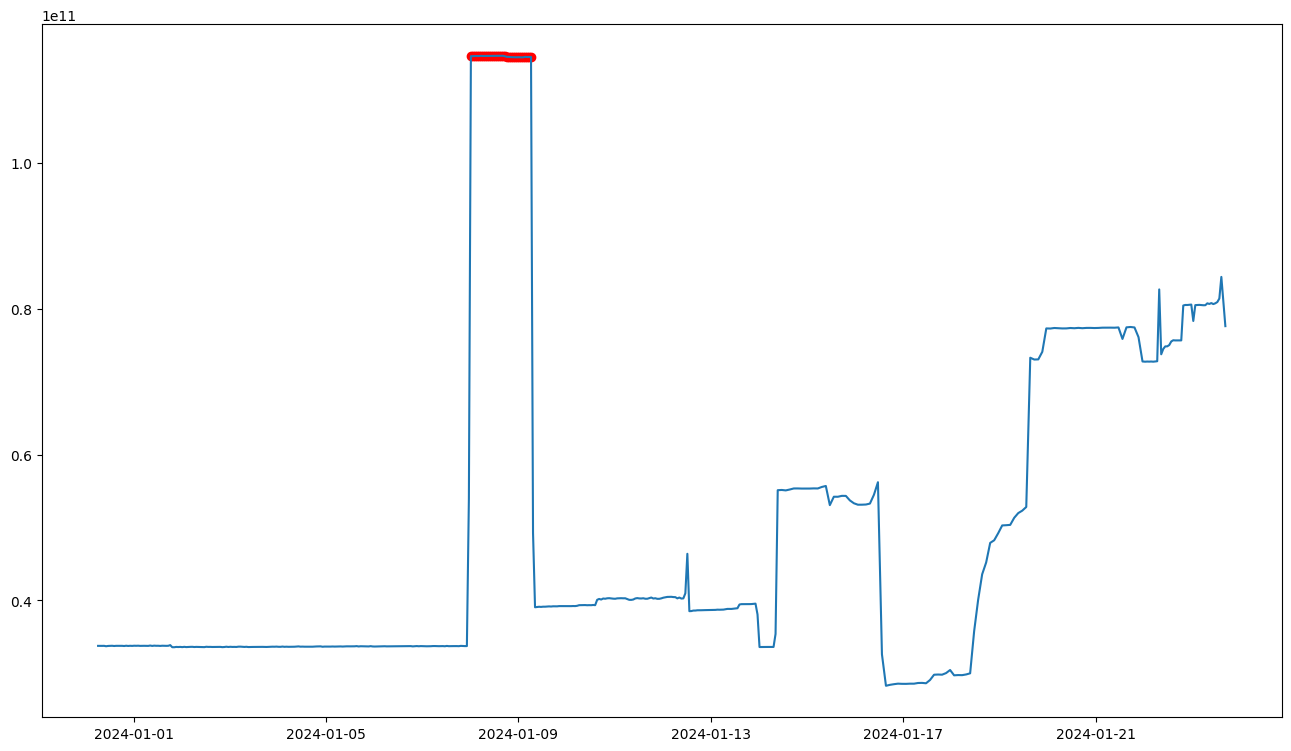

In [ ]:
# df_test = df.iloc[28000:28500]
print(df_test[[column_usage]].values)

pred = model.predict(df_test[[column_usage]]
                     .iloc[1400:1872]
                     .values)
dfx = df_test.copy()
dfx = dfx.iloc[1400:1872]
dfx["outlier"] = pred
dfx

fig, ax = plt.subplots(figsize=(16, 9))
a = dfx.loc[dfx.outlier == 1, [column_usage]]

ax.plot(dfx.index, dfx[column_usage])
ax.scatter(a.index, a[column_usage], color='red')
plt.show()

In [ ]:
y_pred = dfx['outlier']
colors = ['green' if a == 0 else 'red' for a in y_pred]

# Create a scatter plot of the data with anomalies highlighted in red
fig = go.Figure(data=go.Scatter(x=dfx.index, y=dfx[column_usage],
                                 mode='markers', marker=dict(color=colors, size=3)))

# Set the title and axis labels for the plot
fig.update_layout(title=dict(text='LOF Anomaly prediction', x=0.5),
                  yaxis_title='Value',
                  xaxis_title='Timestamp')

# Show the plot
fig.show()

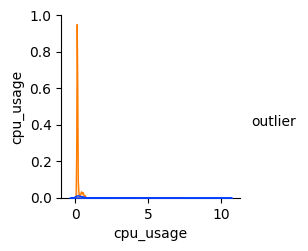

In [ ]:
sns.pairplot(data=dfx, vars = df[[column_usage]],
             hue='outlier', hue_order=[1, 0],
             markers=['*', 'o'],  palette='bright');

# Metrics


In [ ]:
y_pred = (y_pred == 0)
dfx['name'] = y_pred
y_pred

time
2023-10-15 19:10:00    True
2023-10-15 19:15:00    True
2023-10-15 19:20:00    True
2023-10-15 19:25:00    True
2023-10-15 19:30:00    True
                       ... 
2024-02-04 23:35:00    True
2024-02-04 23:40:00    True
2024-02-04 23:45:00    True
2024-02-04 23:50:00    True
2024-02-04 23:55:00    True
Name: outlier, Length: 31036, dtype: bool

In [ ]:
print(dfx['name'].value_counts())

True     27932
False     3104
Name: name, dtype: int64


In [ ]:
p_values = {}
p_stats_ = {}
percent = {}
silhoutte = {}
calinski_harabasz = {}
davies_bouldin = {}

# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

cols_in = [column_usage]

In [ ]:
dfx['name'].value_counts()

True     27932
False     3104
Name: name, dtype: int64

In [ ]:
#percent anomaly
dist = dfx['name'].value_counts(normalize=True)
print(dist)
percent['name'] = dist.loc[True]

True     0.899987
False    0.100013
Name: name, dtype: float64


In [ ]:
#silhouette conficient samples non-anomaly
labels = [1 if i == True else 2 for i in dfx['name']]
dfx['silhouette_zcore_'] = silhouette_samples(df[[column_usage]], labels)
print(silhouette_samples(df[[column_usage]], labels))
print(dfx[dfx['name']]['silhouette_zcore_'])
silhoutte['name'] = dfx[dfx['name']]['silhouette_zcore_'].mean()

[-0.01425005 -0.18377488 -0.1740781  ...  0.81917874  0.8198358
  0.82032558]
time
2023-10-15 19:10:00   -0.014250
2023-10-15 19:15:00   -0.183775
2023-10-15 19:20:00   -0.174078
2023-10-15 19:25:00   -0.174990
2023-10-15 19:30:00   -0.181184
                         ...   
2024-02-04 23:35:00    0.818848
2024-02-04 23:40:00    0.818848
2024-02-04 23:45:00    0.819179
2024-02-04 23:50:00    0.819836
2024-02-04 23:55:00    0.820326
Name: silhouette_zcore_, Length: 27932, dtype: float64


In [ ]:
from sklearn.metrics import calinski_harabasz_score

ch_index = calinski_harabasz_score(df[[column_usage]], labels)
calinski_harabasz['name'] = round(ch_index, 3)
print("Calinski-Harabasz Index:", round(ch_index, 3))

Calinski-Harabasz Index: 4685.819


In [ ]:
from sklearn.metrics import davies_bouldin_score

dbi = davies_bouldin_score(df[[column_usage]], labels)
davies_bouldin['name'] = round(dbi, 3)
print("Davies-Bouldin Index:", round(dbi, 3))

Davies-Bouldin Index: 1.458


In [ ]:
#ks coeficient
normal = dfx.loc[dfx['name'] == False, [column_usage]]
anomaly = dfx.loc[dfx['name'] == True, [column_usage]]
print(normal)
print(anomaly)
print(len(normal))
print(len(anomaly))
for col_in in tqdm(cols_in):
  if len(normal)>0 and len(anomaly)>0:
    stats_, pvalue = stats.kstest(normal[col_in], anomaly[col_in])
    p_values[col_in+'_'] = pvalue
    p_stats_[col_in+'_'] = stats_

                     cpu_usage
time                          
2023-10-16 03:30:00     1.7000
2023-10-16 03:35:00     1.8100
2023-10-16 03:40:00     1.7700
2023-10-16 03:45:00     1.6600
2023-10-16 03:50:00     1.5600
...                        ...
2024-02-04 19:25:00     0.0808
2024-02-04 19:30:00     0.0808
2024-02-04 19:50:00     0.0798
2024-02-04 19:55:00     0.0796
2024-02-04 20:20:00     0.0799

[3104 rows x 1 columns]
                     cpu_usage
time                          
2023-10-15 19:10:00     0.7230
2023-10-15 19:15:00     1.6500
2023-10-15 19:20:00     1.3900
2023-10-15 19:25:00     1.4000
2023-10-15 19:30:00     1.4900
...                        ...
2024-02-04 23:35:00     0.0799
2024-02-04 23:40:00     0.0799
2024-02-04 23:45:00     0.0801
2024-02-04 23:50:00     0.0805
2024-02-04 23:55:00     0.0808

[27932 rows x 1 columns]
3104
27932


100%|██████████| 1/1 [00:00<00:00, 239.22it/s]


pvalue
  svm_algorithm  pvalue
0    cpu_usage_     0.0
{'cpu_usage_': 0.0}


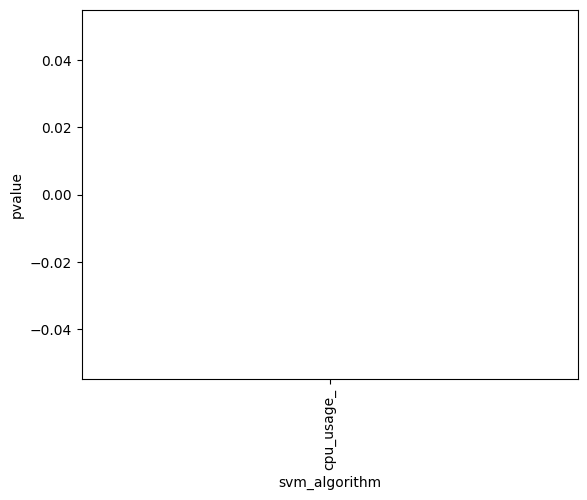

statistics
  svm_algorithm  statistics
0    cpu_usage_    0.460695
{'cpu_usage_': 0.46069476903407536}


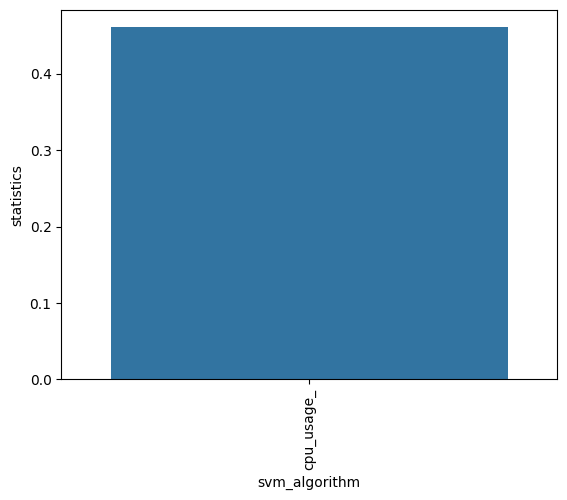

percent
  svm_algorithm   percent
0          name  0.899987
{'name': 0.8999871117412037}


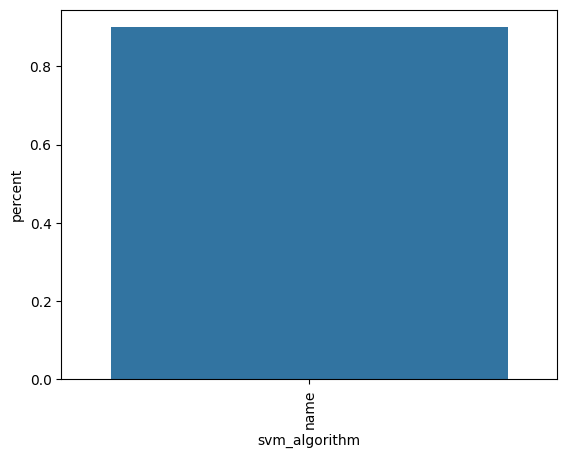

silhoutte
  svm_algorithm  silhoutte
0          name   0.766743
{'name': 0.7667427658264266}


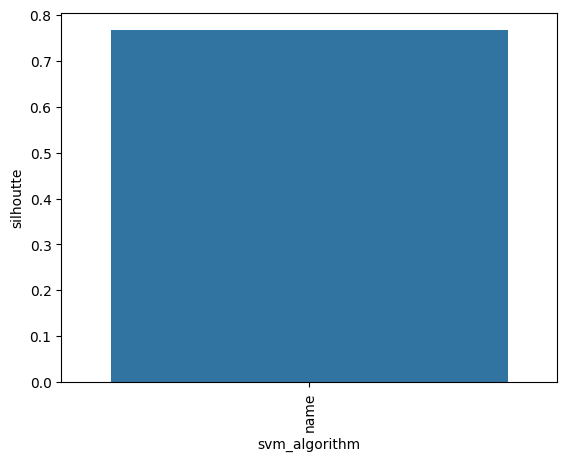

calinski_harabasz
  svm_algorithm  calinski_harabasz
0          name           4685.819
{'name': 4685.819}


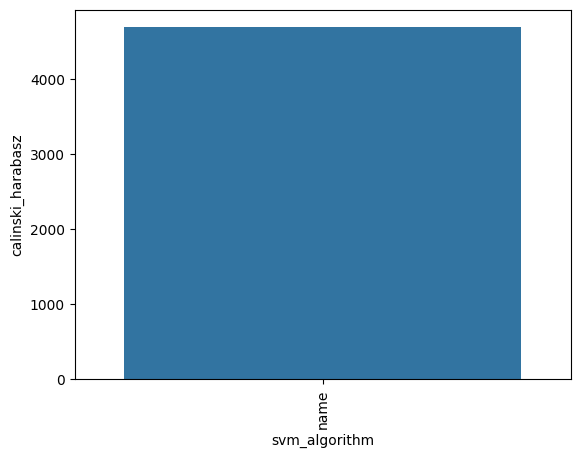

davies_bouldin
  svm_algorithm  davies_bouldin
0          name           1.458
{'name': 1.458}


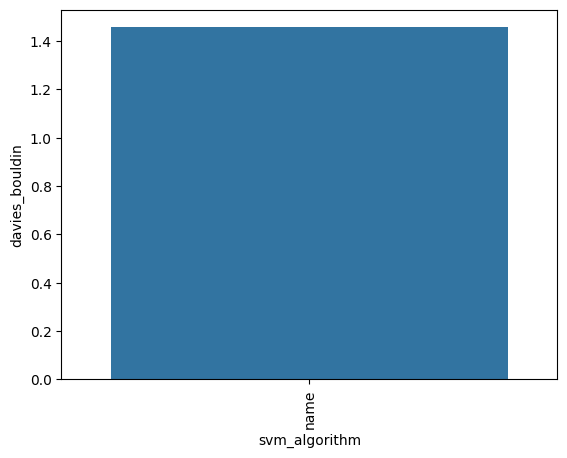

In [ ]:
for name, dictionary in {'pvalue': p_values, 'statistics': p_stats_, 'percent': percent, 'silhoutte':silhoutte, 'calinski_harabasz': calinski_harabasz, 'davies_bouldin': davies_bouldin}.items():
    print(name)
    df_values =  pd.DataFrame([dictionary])
    df_values = df_values.T
    df_values.reset_index(inplace=True)
    df_values.columns = ['svm_algorithm', name]
    print(df_values)
    print(dictionary)

    sns.barplot(data=df_values, x='svm_algorithm', y=name)
    plt.xticks(df_values.index, df_values['svm_algorithm'].values, rotation=90)
    plt.show()

In [ ]:
for name, dictionary in {'pvalue': p_values, 'statistics': p_stats_, 'percent': percent, 'silhoutte':silhoutte, 'calinski_harabasz': calinski_harabasz, 'davies_bouldin': davies_bouldin}.items():
    print(name + ': ' + str(np.array(list(dictionary.values())).mean()))

pvalue: 0.0
statistics: 0.46069476903407536
percent: 0.8999871117412037
silhoutte: 0.7667427658264266
calinski_harabasz: 4685.819
davies_bouldin: 1.458


# Save Model

In [ ]:
#  model.save('/content/drive/MyDrive/Colab Notebooks/k8s/models/model_transformer_collected.h5')


In [ ]:
# import torch

# torch.save(model, "/content/drive/MyDrive/Colab Notebooks/k8s/models/model_transformer_collected.h5")

In [ ]:
# path = 'save_file.pkl'
# model.save_model(path) # save trained model at the assigned path

AttributeError: 'AnomalyTransformer' object has no attribute 'save_model'

In [ ]:
import pickle
path = '/content/drive/MyDrive/Colab Notebooks/k8s/models/model_transformer_collected_' + column_usage + '.pkl'

pickle.dump(model, open(path, 'wb'))